In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display
from PIL import Image

import os
# check for set environment variable JB_NOSHOW
show = True
if 'JB_NOSHOW' in os.environ:
    show = False

# Basic Example, Data Analysis II

## Setup Description

The goal here is to plot Figure 1.13, which shows the heat release rates (HRR) of different pieces of furniture, as documented by [Babrauskas and Lawson](https://www.nist.gov/publications/upholstered-furniture-heat-release-rates-measured-furniture-calorimeter). We aim to fit the 't-squared' design fire with a fire-growth coefficient of 0.19 kW/s² and a virtual ignition time of 90 seconds to the experimental data.

We will follow these steps:

1. **Download the CSV files**:
   The values to be plotted have been extracted from [figure 16 in the article](https://www.nist.gov/publications/upholstered-furniture-heat-release-rates-measured-furniture-calorimeter) using [WebPlotDigitizer](04_basic_example_iv.ipynb) and can be downloaded as text files for:
   - [Sofa](./data/Furniture_calorimetry/Fig16_Sofa.txt)
   - [Love seat](./data/Furniture_calorimetry/Fig16_LoveSeat.txt)
   - [Single chair](./data/Furniture_calorimetry/Fig16_SingleChair.txt)

2. **Read the files**.

3. **Define a function for the design fire**.

4. **Use the function to describe the design fire HRR**.

5. **Plot the HRR curves**.

Following the previous example, we will use the Python libraries `os`, `pandas`, `numpy` and `matplotlib`.




In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


In [3]:
#Function for growth of fire from section 1.2 Fire Safety Engineering, Fire Scenario: 
def alpha_t_squared(time, alpha):
    
    #HRR = α×time^2
    HRR = alpha * np.square(time)
    
    return HRR

In [4]:
#Describe the Design fire HRR:
time_series = np.linspace(0,130)#creating time series
alpha=0.19  # ultra fast
HRR = alpha_t_squared(time_series, alpha)


In [2]:
# Check files with experiment data.
folder_path=os.path.join("data", "Furniture_calorimetry")
files = os.listdir(folder_path)
print(files)

['Fig16_LoveSeat.txt', 'Fig16_Sofa.txt', 'Fig16_SingleChair.txt']


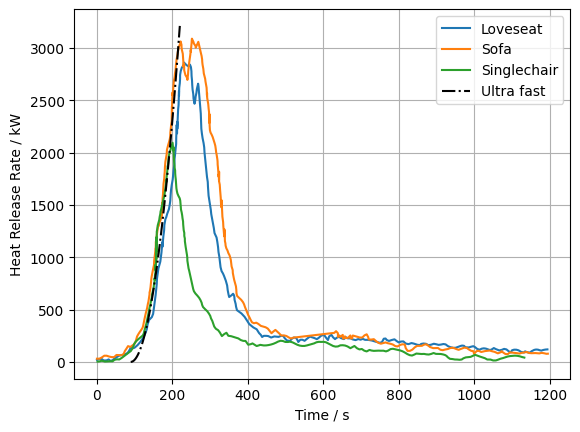

In [6]:
# Read the data from the experiments.
for file in files:
    # Filter out specific type of files.
    if file.endswith('.txt'):
        # Create data series label.
        label = os.path.splitext(file )[0].split('_')[-1]  # Extract label from filename
        
        # Read file.
        file_path = os.path.join(folder_path,file)
        furniture_df = pd.read_csv(file_path, header=0)
        
        if "Chair" in file:
            # Shift data series such that the increasing slopes align.
            time_shift = 60
        else:
            time_shift = 0
            
        # Plot data series.
        plt.plot(furniture_df['Time'] - time_shift, 
                 furniture_df['HRR'], 
                 label=label.capitalize())

# Plot alpha_t_squared function results.
virtual_ignition_time = 90
plt.plot(time_series + virtual_ignition_time, 
         HRR, 
         color='k', linestyle='-.', 
         label="Ultra fast")


# Plot meta data.
plt.xlabel("Time / s")
plt.ylabel("Heat Release Rate / kW")
plt.legend()
plt.grid()

# Show plot.
plt.show() 